In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300
np.random.seed(90210)

In [3]:
y_obs =  np.random.normal(0, 1, size=100)
idatas_cmp = {}

with pm.Model() as mA:
    σ = pm.HalfNormal("σ", 1)
    y = pm.SkewNormal("y", 0, σ, alpha=1, observed=y_obs)
    idataA = pm.sample(return_inferencedata=True)
    idataA.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(idataA)["y"][None,:]}})
    idatas_cmp["mA"] = idataA

with pm.Model() as mB:
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", 0, σ, observed=y_obs)
    idataB = pm.sample(return_inferencedata=True)
    idataB.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(idataB)["y"][None,:]}})
    idatas_cmp["mB"] = idataB

with pm.Model() as mC:
    μ = pm.Normal("μ", 0, 1)
    σ = pm.HalfNormal("σ", 1)
    y = pm.Normal("y", μ, σ, observed=y_obs)
    idataC = pm.sample(return_inferencedata=True)
    idataC.add_groups({"posterior_predictive": {"y":pm.sample_posterior_predictive(idataC)["y"][None,:]}})
    idatas_cmp["mC"] = idataC

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [4]:
cmp = az.compare(idatas_cmp)
cmp.round(2)

/u/32/martino5/unix/anaconda3/envs/pymcv3/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
mB,0,-137.83,0.92,0.00,1.0,7.07,0.00,False,log
mC,1,-138.57,1.99,0.74,0.0,7.03,0.83,False,log
mA,2,-168.02,1.32,30.20,0.0,10.34,6.55,False,log


In [5]:
#print(cmp.round(2).to_latex())

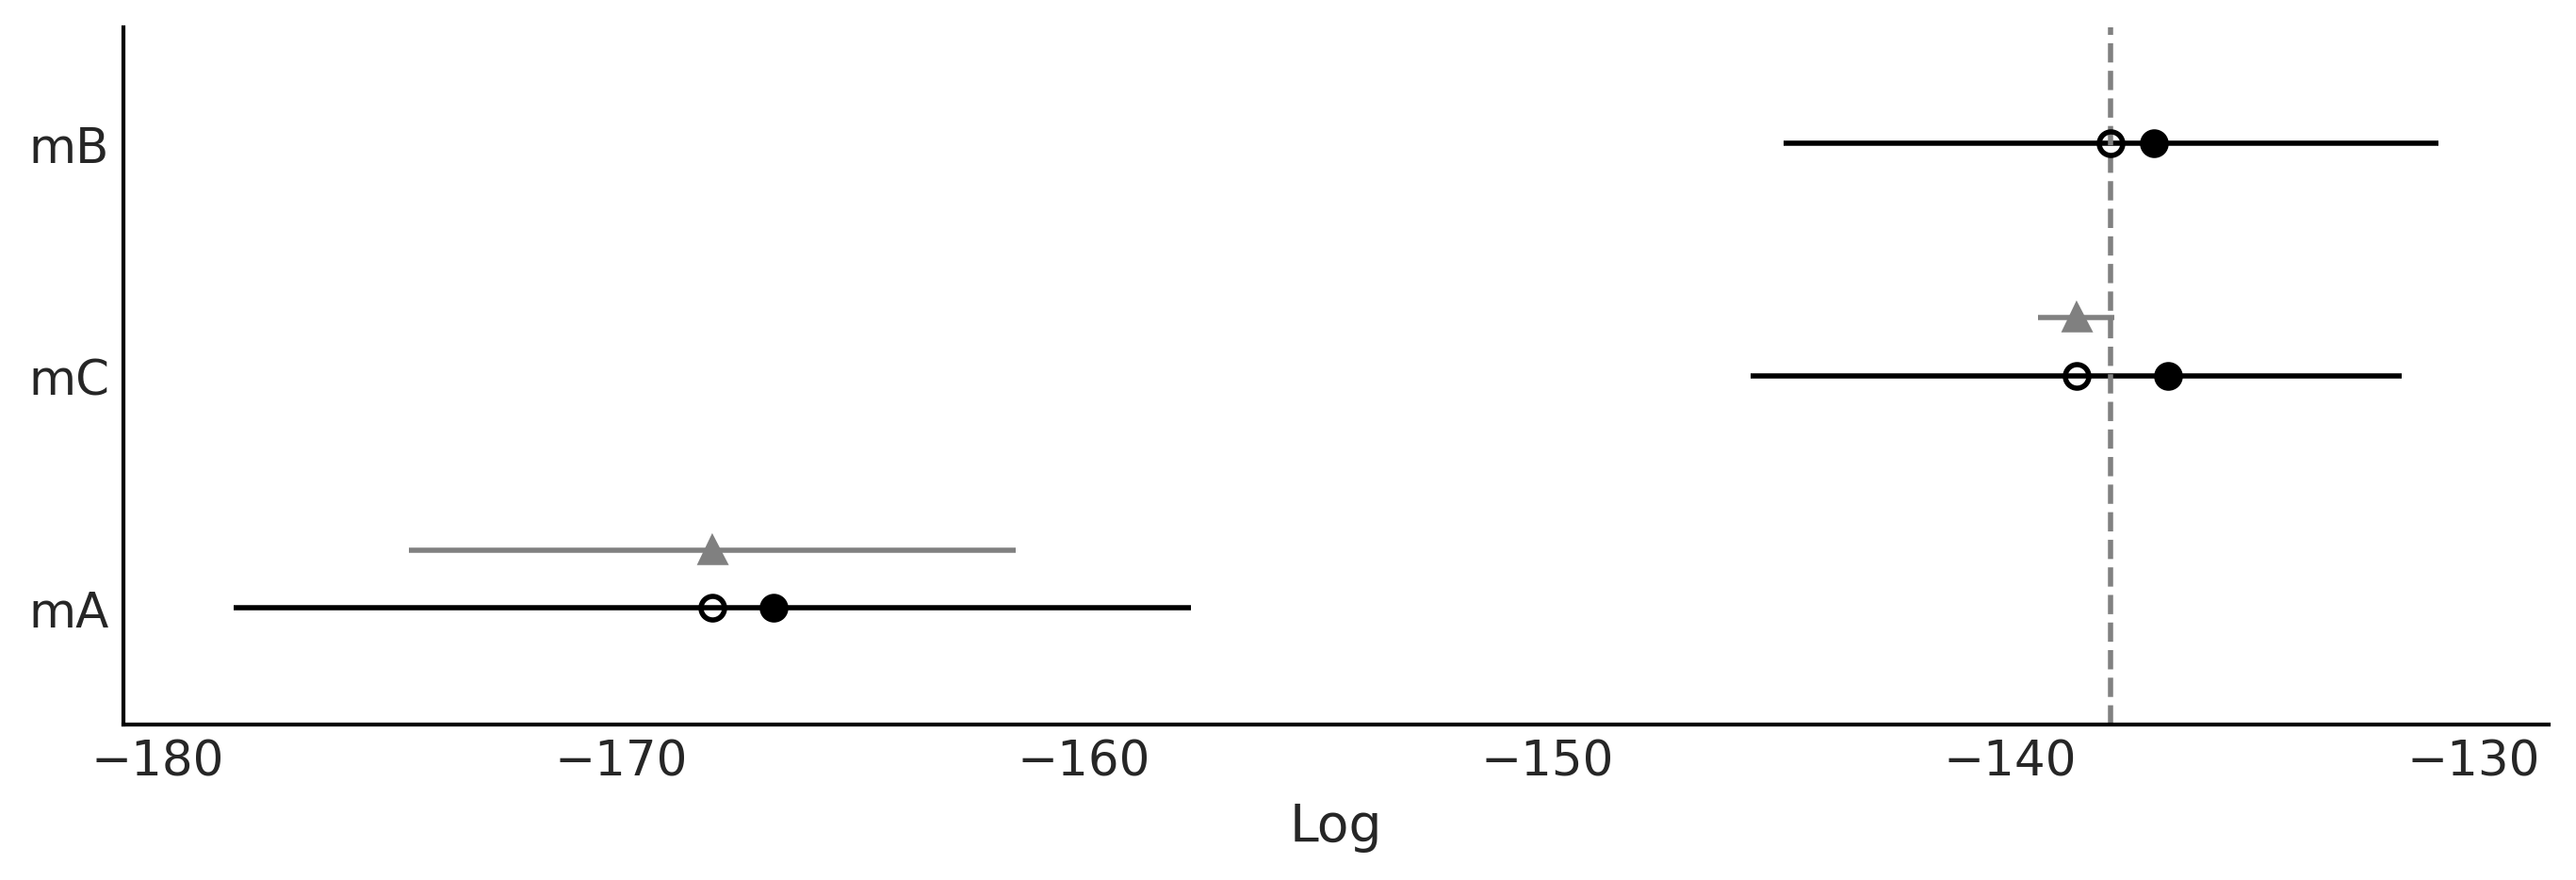

In [6]:
az.plot_compare(cmp, figsize=(9, 3))
plt.savefig("img/chp02/compare_dummy.png")

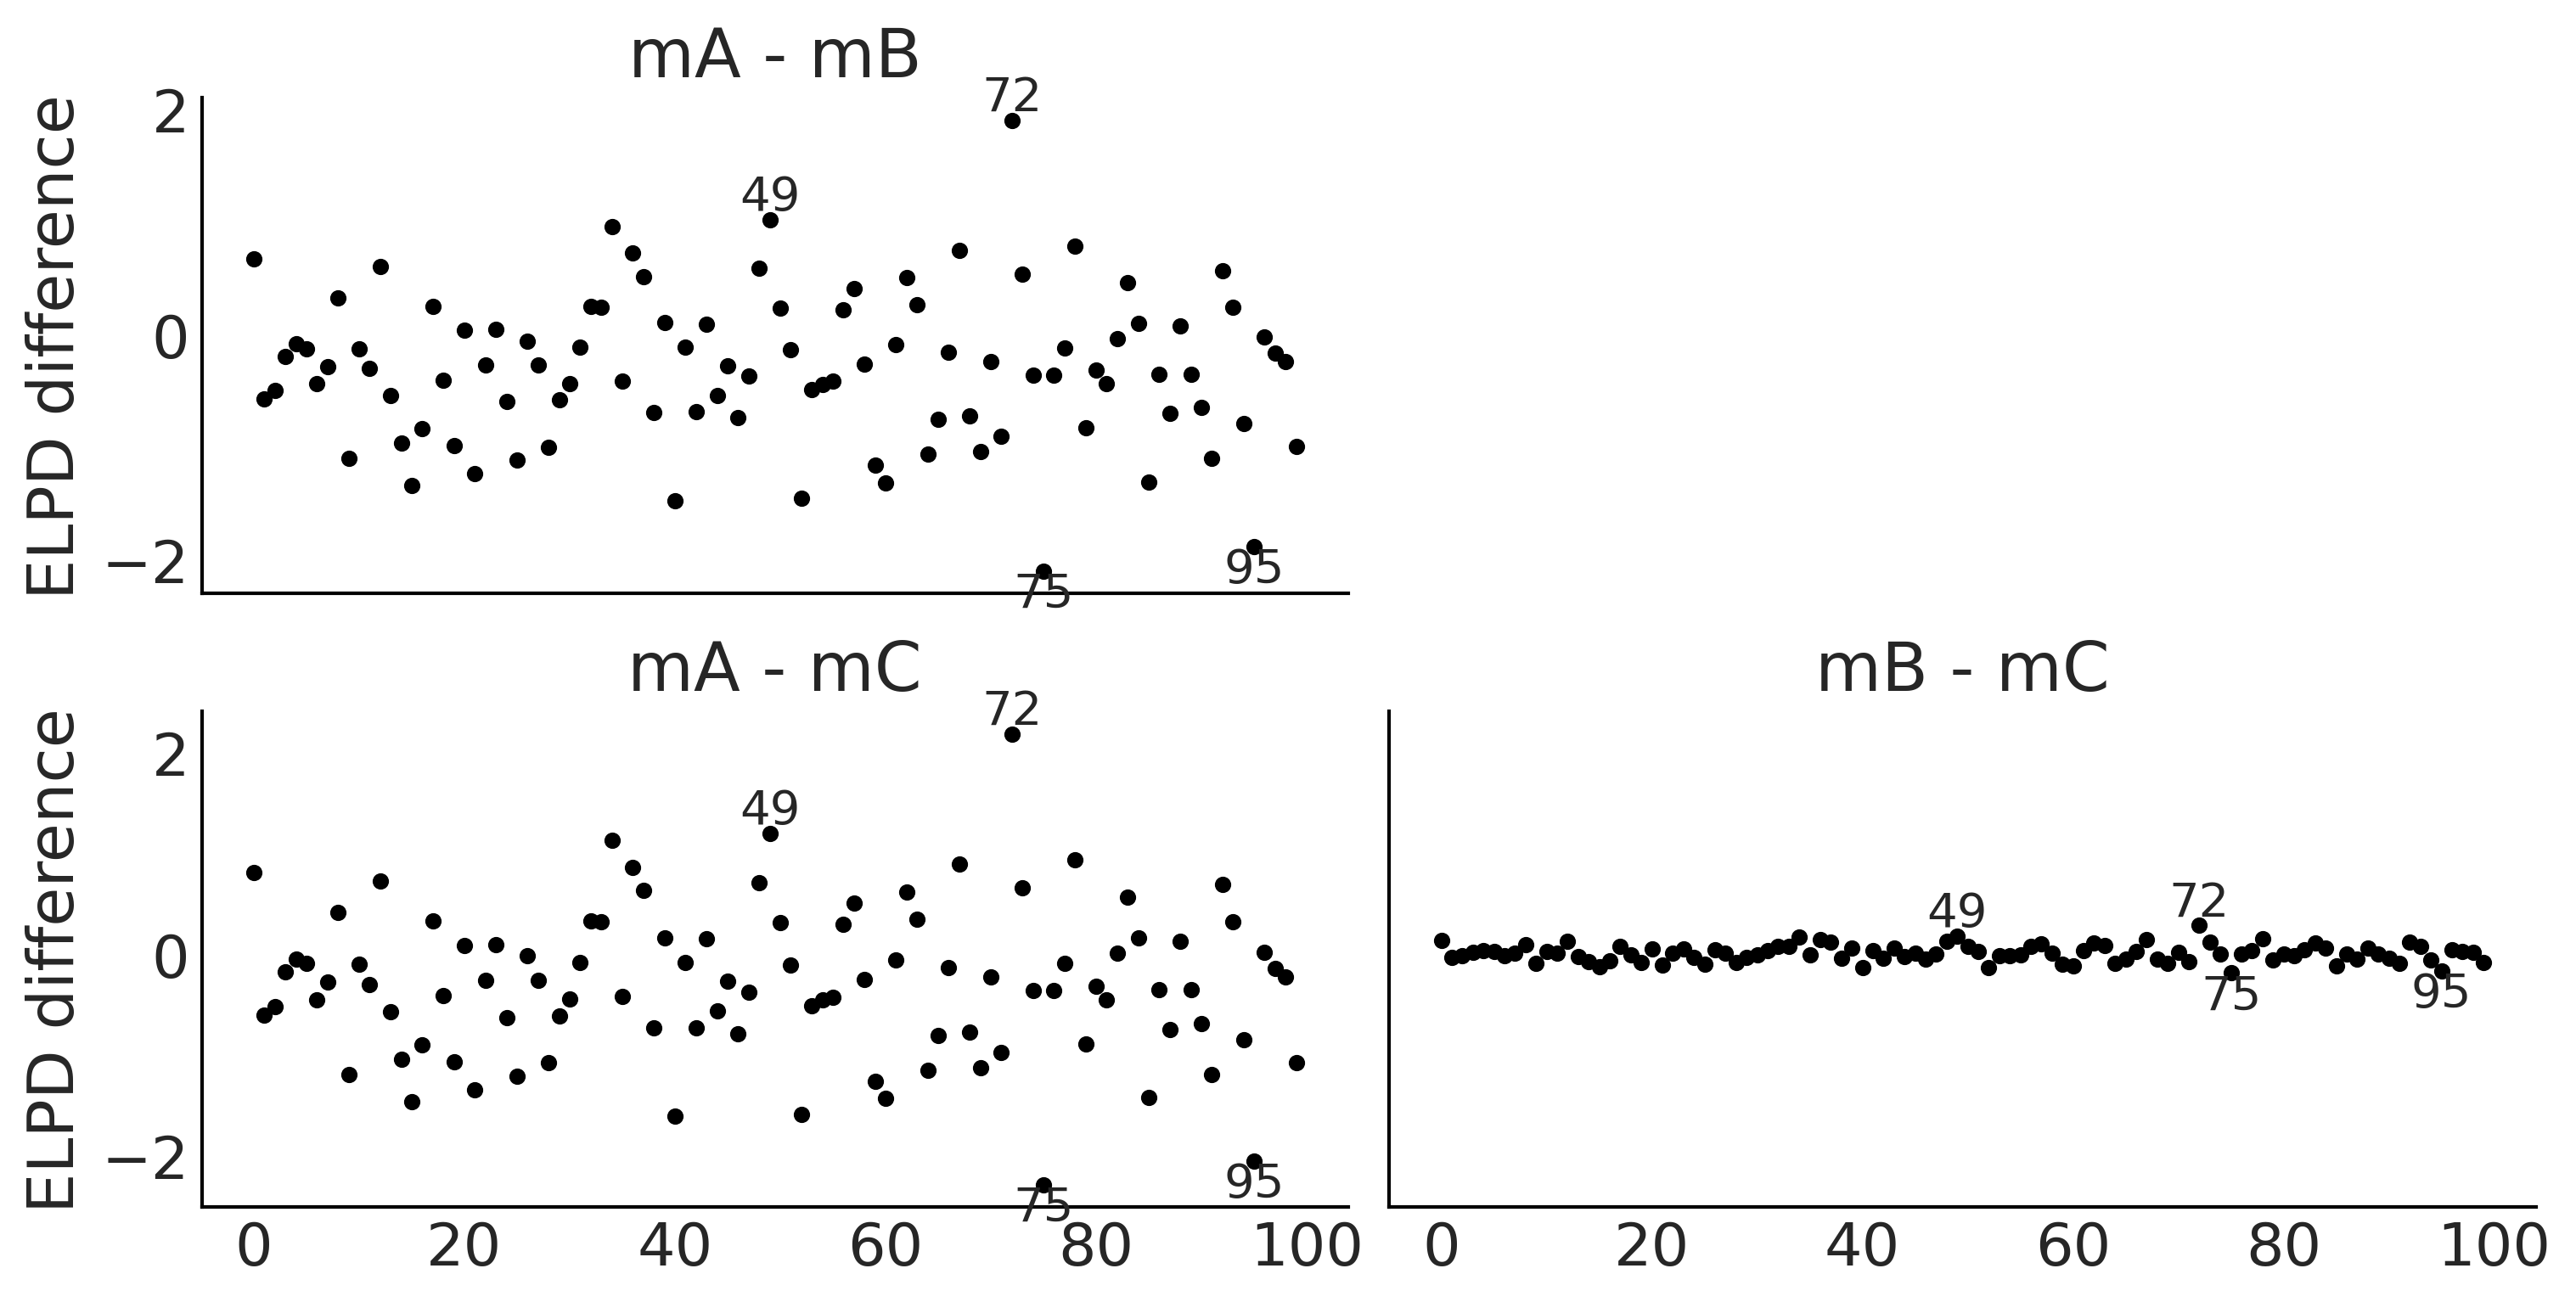

In [7]:
az.plot_elpd(idatas_cmp, figsize=(10, 5), plot_kwargs={"marker":"."}, threshold=2);
plt.savefig("img/chp02/elpd_dummy.png")

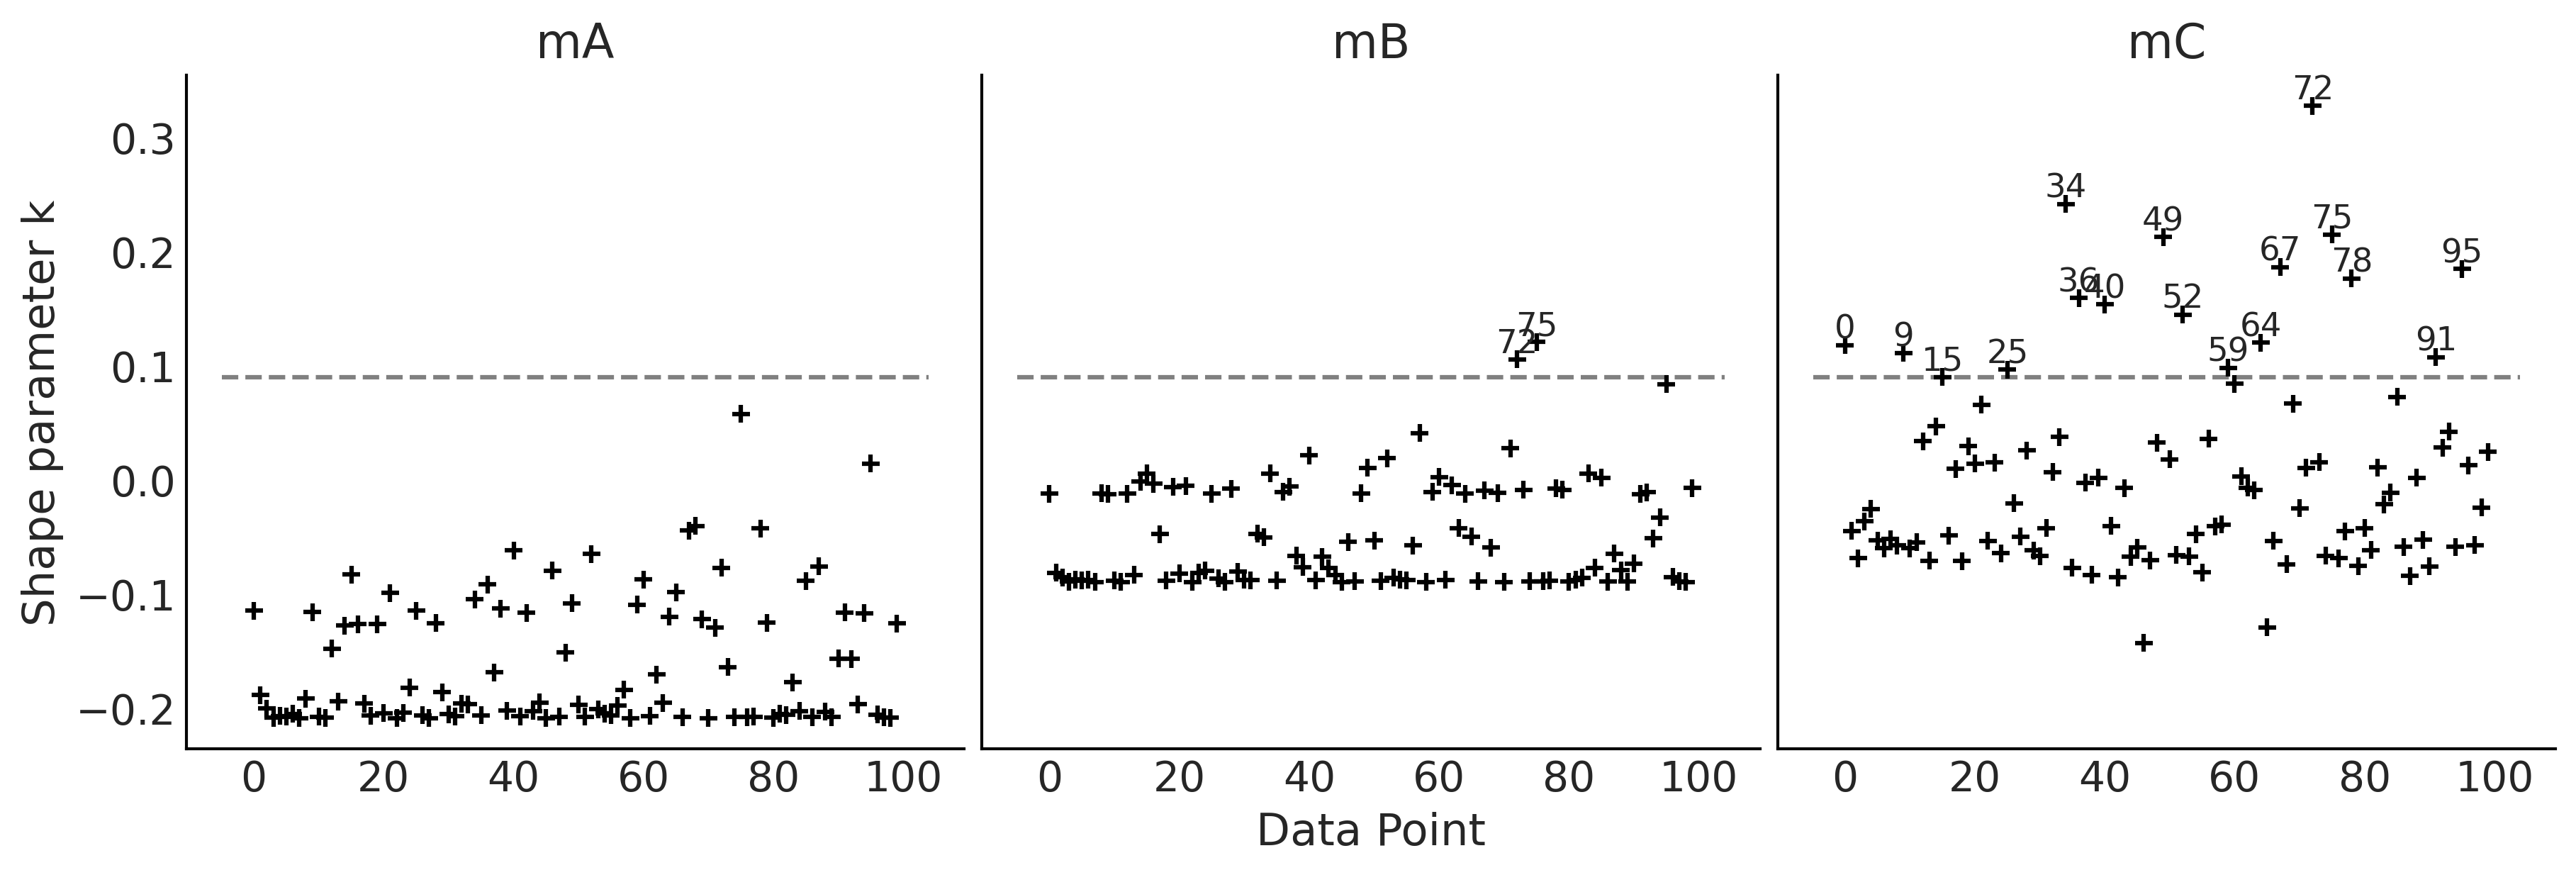

In [8]:
_, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for idx, (model, ax) in enumerate(zip(("mA", "mB", "mC"), axes)):
    loo_ = az.loo(idatas_cmp[model], pointwise=True)
    az.plot_khat(loo_, ax=ax, threshold=0.09, show_hlines=True, hlines_kwargs={"hlines":0.09, "ls":"--"})
    ax.set_title(model)
    if idx:
        axes[idx].set_ylabel("")
    if not idx % 2:
        axes[idx].set_xlabel("")

plt.savefig("img/chp02/loo_k_dummy.png")

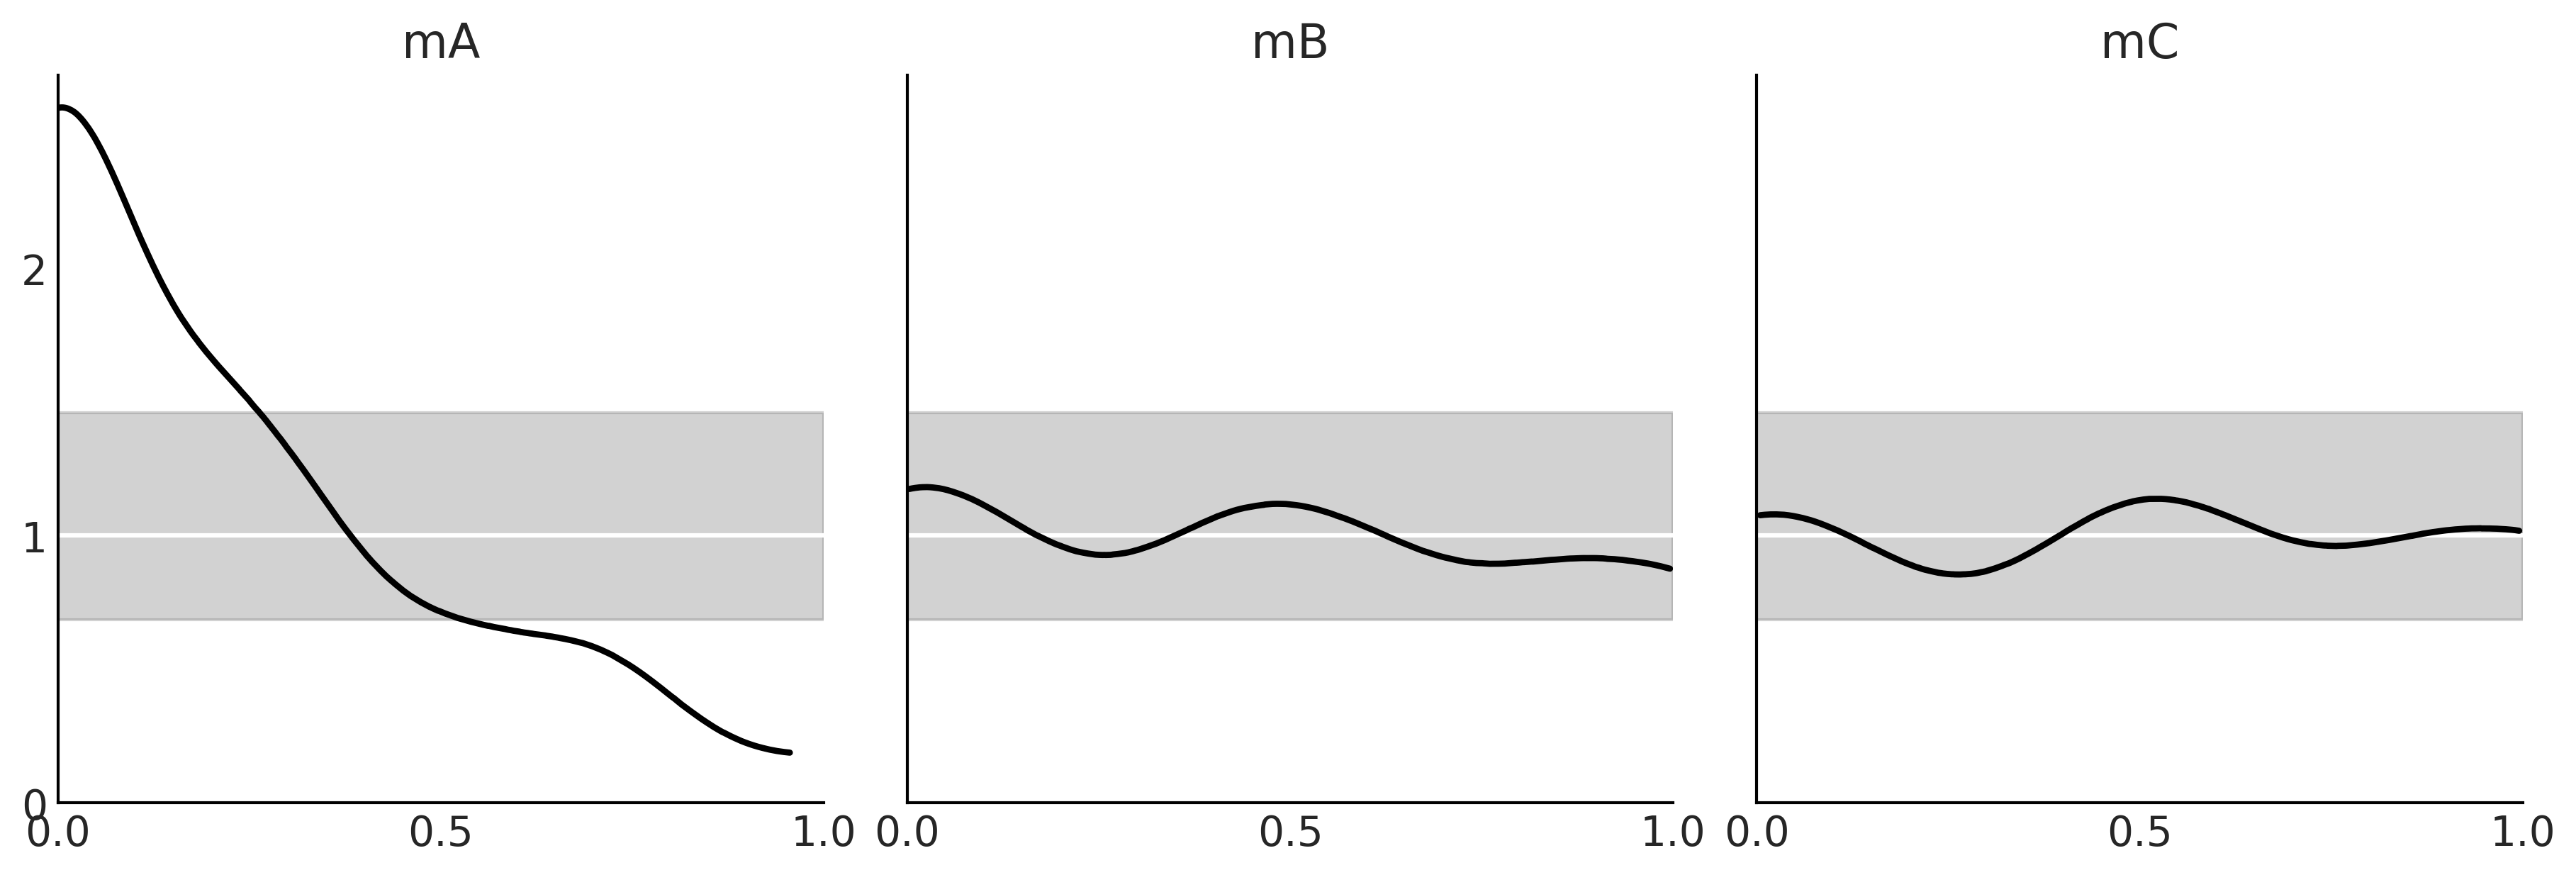

In [9]:
_, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for model, ax in zip(("mA", "mB", "mC"), axes):
    az.plot_loo_pit(idatas_cmp[model], y="y", legend=False, use_hdi=True, ax=ax)
    ax.set_title(model)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 1, 2])

plt.savefig("img/chp02/loo_pit_dummy.png")

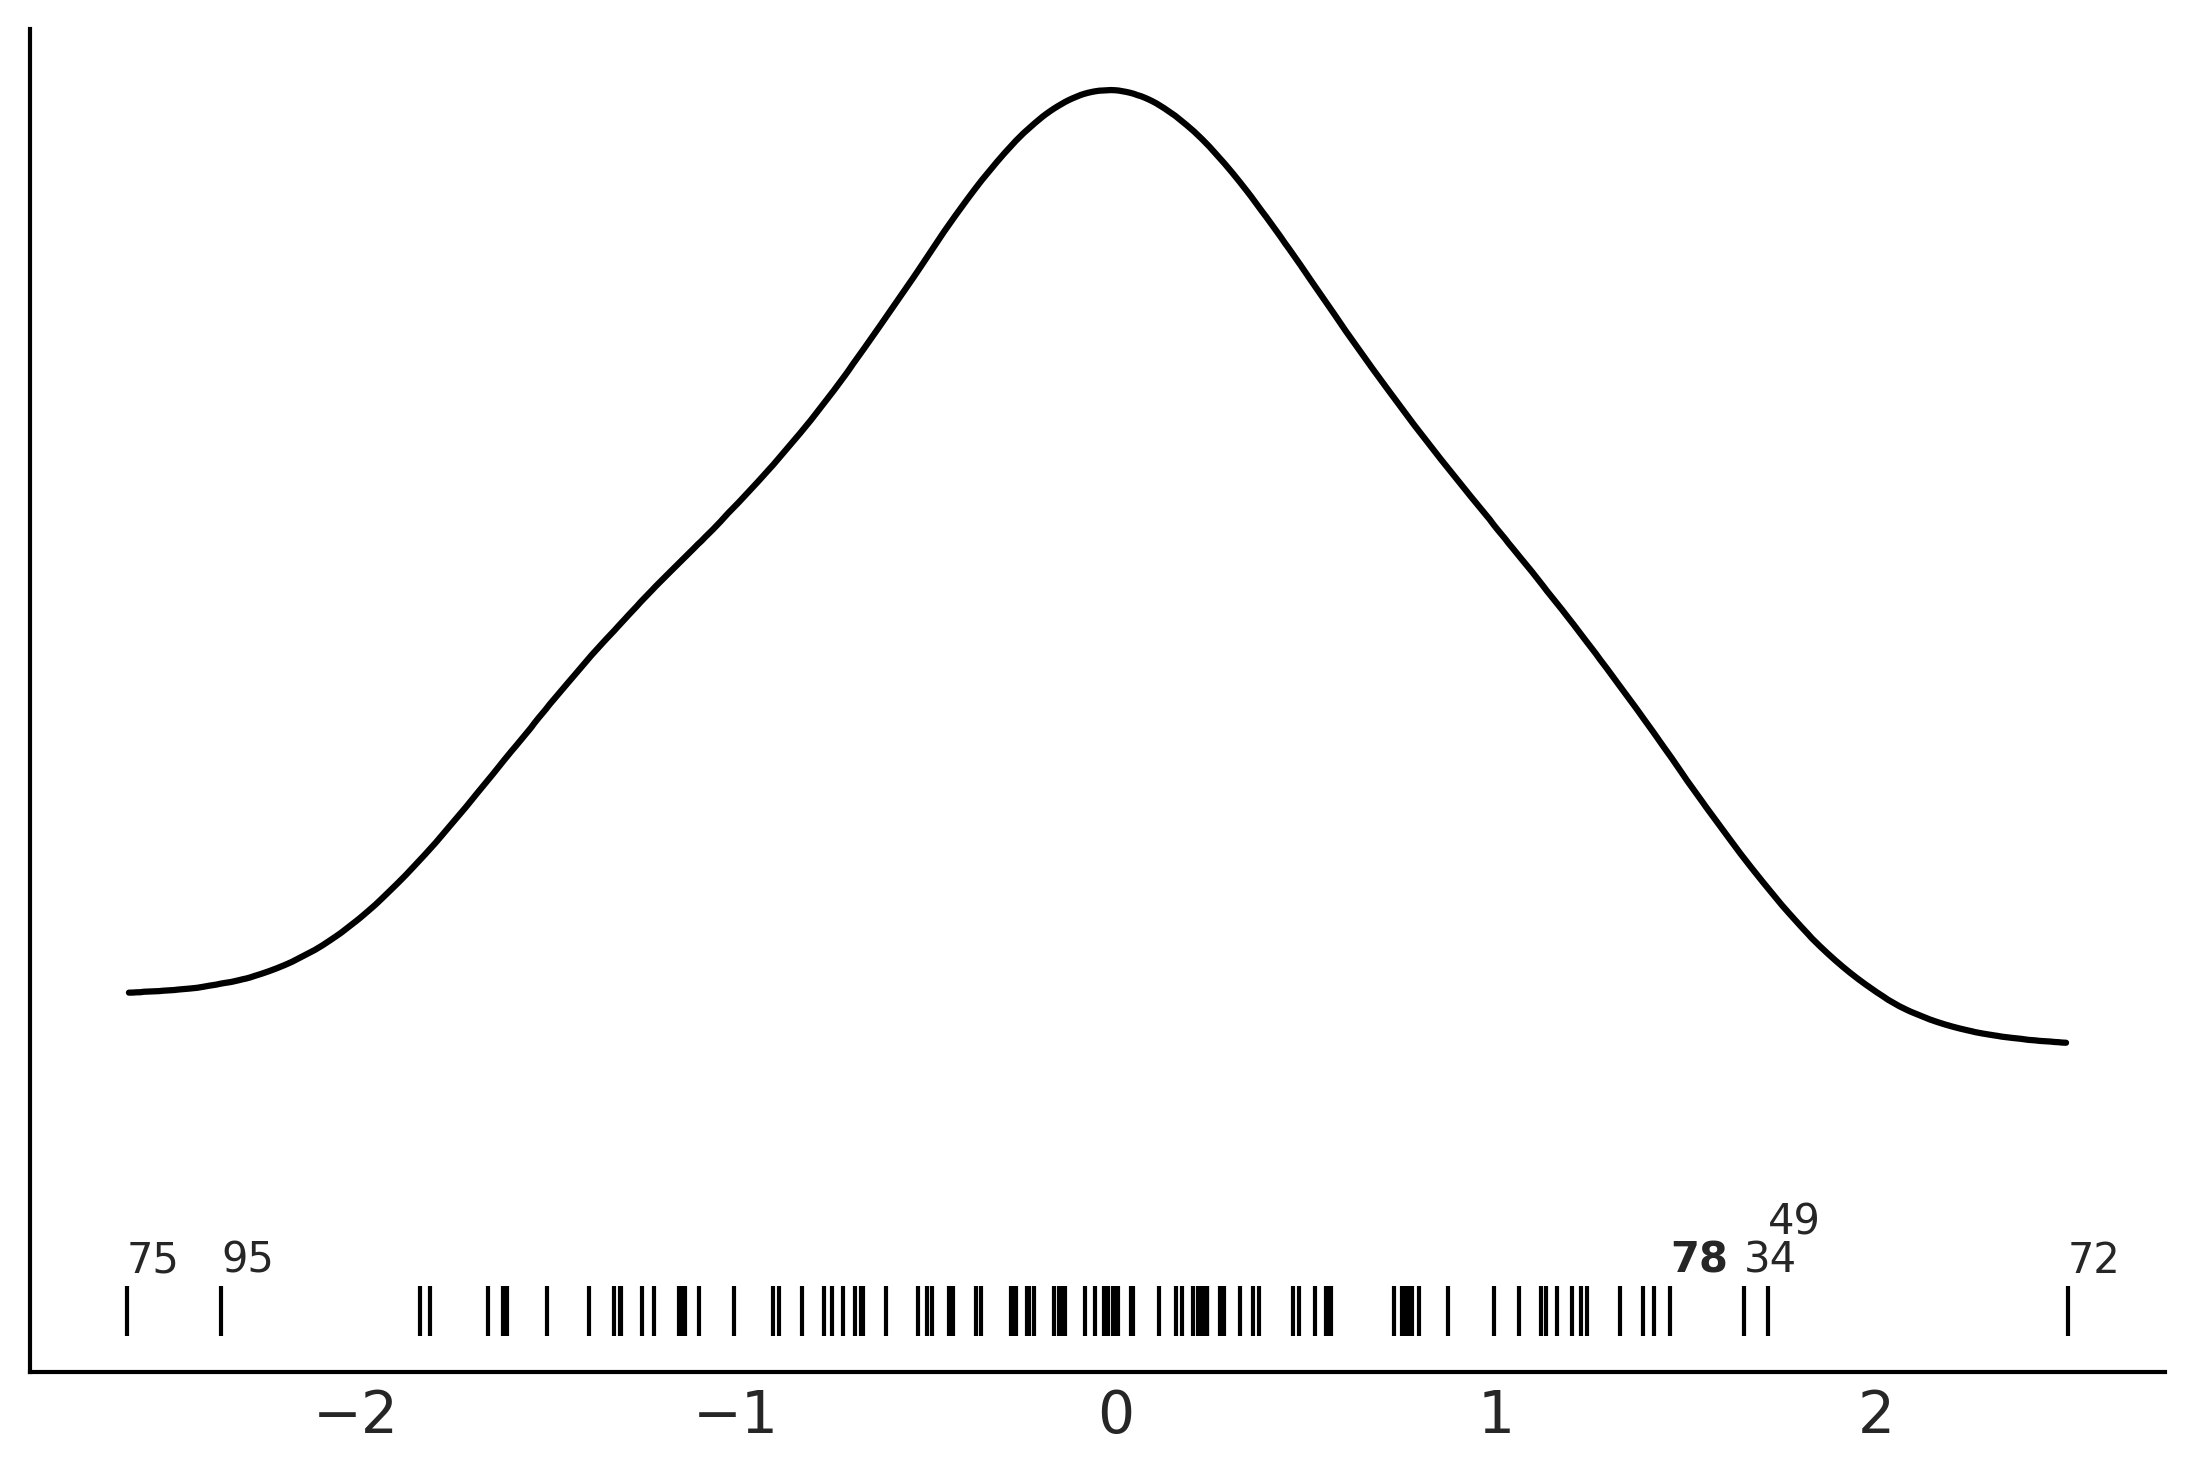

In [10]:
az.plot_kde(y_obs, rug=True)
plt.yticks([])
for da, loc in zip([34, 49, 72, 75, 95], [-0.065, -0.05, -0.065, -0.065, -0.065]):
    plt.text(y_obs[da], loc, f"{da}")

plt.text(y_obs[78], loc, "78", fontweight='bold');
plt.savefig("img/chp02/elpd_and_khat.png")